# DATA 240-21, Fall 2024  
# Assignment #1  


Release on Sept 11th, 2024  

Due 11:59pm on Sept 24th, 2024   

Notes  
This assignment should be submitted in Canvas as a format of ipython notebook (assignment1.ipynb).  

No late assignments will be accepted. Do not accept any other format. Minimum penalty is 2pts with acceptable excuse. You may collaborate on homework but must independently write code/solutions. Copying and other forms of cheating will not be tolerated and will result in a zero score for the homework (minimal penalty) or a failing grade for the course. Your work will be graded in terms of correctness, completeness, and clarity, not just the answer. Thus, correct answers with no or poorly written supporting steps may receive very little credit.  
 
Please download used_cars_data.csv. This is a dataset consisting of used car sales prices.  
 

# 1. (1 pt) Data cleaning  

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('used_cars_data.csv')
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


### Please remove the following columns: ‘S.No’ and ‘New_Price’.  

In [3]:
df = df.drop(columns = ['S.No.', 'New_Price'])
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


### Please create ‘Car_Age’ feature which is defined as the difference between the current year and the year the  car was built. E.g. “Car_Age” for the first record is 14. 

In [4]:
from datetime import datetime

current_year = datetime.now().year

# Define the UDF to calculate car age
def get_car_age(year_built):
    return current_year - year_built

df['Car_Age'] = df['Year'].apply(get_car_age)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,13
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,9
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,12
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,11


### There are two records for Electric vehicles. The corresponding mileage columns are empty. Please search  internet what will be the reasonable value and fill out it. Please provide the logics with the reference.  


In [5]:
df[df['Fuel_Type'] == 'Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00,8
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75,13


In [6]:
typical_ev_mileage = '250 mpg'

# Fill missing mileage values for Electric Vehicles
df.loc[(df['Fuel_Type'] == 'Electric') & (df['Mileage'].isna()), 'Mileage'] = typical_ev_mileage

df[df['Fuel_Type'] == 'Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,250 mpg,72 CC,41 bhp,5.0,13.00,8
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,250 mpg,1798 CC,73 bhp,5.0,12.75,13


# 2. (2 pts) Transformation   

### Among the columns in the dataset, python datatype of the ‘Mileage’, ‘Engine’, ‘Power’ columns are ‘object’.  Please convert them to numerical datatype. Remove unit and convert string to numerical value (floating point  or integer)  


### NOTE: 
You should check the unit of the three columns. If there is more than two units in a column, you should find dominant unit and perform unit conversion to achieve consistency within the column. Please describe step by step for the unit conversion. Please include the reference.  
 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7253 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
 12  Car_Age            7253 non-null   int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 736.8+ KB


In [8]:
def find_dominant_unit(df, column):
    # Step 1: Identify units in the Mileage column
    def get_unit(value):
        return str(value).split(" ")[-1]

    # Create a new column to store the units
    df['Unit'] = df[column].apply(get_unit)

    # Step 2: Count occurrences of each unit
    unit_counts = df['Unit'].value_counts()
    print(f"{column = }, Unit counts:\n", unit_counts)

    # Step 3: Find the dominant unit
    dominant_unit = unit_counts.idxmax()
    print(f"\nDominant unit for {column = }, {dominant_unit = }")
    return dominant_unit

In [9]:
# Milage Conversion

# # Step 1: Identify units in the Mileage column
# def get_unit(value):
#     return str(value).split(" ")[-1]

# # Create a new column to store the units
# df['Mileage_Unit'] = df['Mileage'].apply(get_unit)

# # Step 2: Count occurrences of each unit
# unit_counts = df['Mileage_Unit'].value_counts()
# print("Unit counts:\n", unit_counts)

# # Step 3: Find the dominant unit
# dominant_unit = unit_counts.idxmax()
# print("\nDominant unit:", dominant_unit)

# Step 4: Convert non-dominant units to the dominant unit (if required)
def convert_mileage(value, dominant_unit):
    mileage_value = float(value.split()[0])
    
    # Conversion factors
    mpl_to_kmpl = 2.352
    kmpl_to_mpl = 1 / mpl_to_kmpl
    mpg_to_kmpl = 0.425
    kmpl_to_mpg = 1 / mpg_to_kmpl

    if dominant_unit == 'kmpl':
        if 'mpl' in value:
            return mileage_value * mpl_to_kmpl  # Convert mpl to kmpl
        elif 'mpg' in value:
            return mileage_value * mpg_to_kmpl  # Convert mpg to kmpl
    elif dominant_unit == 'mpl':
        if 'kmpl' in value:
            return mileage_value * kmpl_to_mpl  # Convert kmpl to mpl
        elif 'mpg' in value:
            return mileage_value * mpg_to_kmpl * kmpl_to_mpl  # Convert mpg to mpl
    elif dominant_unit == 'mpg':
        if 'kmpl' in value:
            return mileage_value * kmpl_to_mpg  # Convert kmpl to mpg
        elif 'mpl' in value:
            return mileage_value / mpl_to_kmpl * mpg_to_kmpl  # Convert mpl to mpg

    return mileage_value  # No conversion needed


# Apply the conversion only if there are mixed units
dominant_milage_unit = find_dominant_unit(df, 'Mileage')
df['Mileage'] = df['Mileage'].apply(lambda x: convert_mileage(x, dominant_milage_unit))
df

column = 'Mileage', Unit counts:
 Unit
kmpl     7177
km/kg      74
mpg         2
Name: count, dtype: int64

Dominant unit for column = 'Mileage', dominant_unit = 'kmpl'


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60000,998 CC,58.16 bhp,5.0,1.75,14,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,46.26384,1582 CC,126.2 bhp,5.0,12.50,9,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,42.80640,1199 CC,88.7 bhp,5.0,4.50,13,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,48.85104,1248 CC,88.76 bhp,7.0,6.00,12,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,35.75040,1968 CC,140.8 bhp,5.0,17.74,11,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,48.31008,1598 CC,103.6 bhp,5.0,NaN,13,kmpl
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,40.47792,1197 CC,103.6 bhp,5.0,NaN,9,kmpl
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,54.28416,1461 CC,63.1 bhp,5.0,NaN,12,kmpl
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,40.45440,1197 CC,103.6 bhp,5.0,NaN,11,kmpl


In [10]:
df[df['Fuel_Type'] == 'Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Unit
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,106.25,72 CC,41 bhp,5.0,13.00,8,mpg
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,106.25,1798 CC,73 bhp,5.0,12.75,13,mpg


In [11]:
# Engine Conversion

import numpy as np

def convert_engine(value, dominant_unit):
    if pd.isna(value):  # Handle NaN values
        return np.nan
    
    if isinstance(value, str):
        conv_value = value.split(" ")[0]
        return float(conv_value)
    return value

df.info()
dominant_engine_unit = find_dominant_unit(df, 'Engine')
df['Engine'] = df['Engine'].apply(lambda x: convert_engine(x, dominant_engine_unit))
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7253 non-null   float64
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
 12  Car_Age            7253 non-null   int64  
 13  Unit               7253 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB
column = 'Engine', Unit counts:
 Unit
CC     7207
nan      46

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60000,998.0,58.16 bhp,5.0,1.75,14,CC
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,46.26384,1582.0,126.2 bhp,5.0,12.50,9,CC
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,42.80640,1199.0,88.7 bhp,5.0,4.50,13,CC
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,48.85104,1248.0,88.76 bhp,7.0,6.00,12,CC
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,35.75040,1968.0,140.8 bhp,5.0,17.74,11,CC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,48.31008,1598.0,103.6 bhp,5.0,NaN,13,CC
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,40.47792,1197.0,103.6 bhp,5.0,NaN,9,CC
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,54.28416,1461.0,63.1 bhp,5.0,NaN,12,CC
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,40.45440,1197.0,103.6 bhp,5.0,NaN,11,CC


In [12]:
# power conversion

def convert_power(value, dominant_unit):
    try:
        if pd.isna(value):  # Handle NaN values
            return np.nan

        if isinstance(value, str):
            conv_value = float(value.split(" ")[0])  # Extract the numeric value

            # Conversion factors
            hp_to_kw = 0.7457
            kw_to_hp = 1 / hp_to_kw

            if dominant_unit == 'kW':
                if 'hp' in value:
                    return conv_value * hp_to_kw  # Convert hp to kW
            elif dominant_unit == 'hp':
                if 'kW' in value:
                    return conv_value * kw_to_hp  # Convert kW to hp

            # If the unit is already in the desired dominant unit, return the original value
            return conv_value

        return value  # If it's not a string, just return the original value
    except (ValueError, AttributeError) as e:
        # Handle conversion errors or issues with the input
        # print(f"Error converting value '{value}': {e}")
        return np.nan  # Return NaN in case of any conversion failure

dominant_power_unit = find_dominant_unit(df, 'Power')
df['Power'] = df['Power'].apply(lambda x: convert_power(x, dominant_power_unit))
df

column = 'Power', Unit counts:
 Unit
bhp    7207
nan      46
Name: count, dtype: int64

Dominant unit for column = 'Power', dominant_unit = 'bhp'


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60000,998.0,58.16,5.0,1.75,14,bhp
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,46.26384,1582.0,126.20,5.0,12.50,9,bhp
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,42.80640,1199.0,88.70,5.0,4.50,13,bhp
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,48.85104,1248.0,88.76,7.0,6.00,12,bhp
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,35.75040,1968.0,140.80,5.0,17.74,11,bhp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,48.31008,1598.0,103.60,5.0,NaN,13,bhp
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,40.47792,1197.0,103.60,5.0,NaN,9,bhp
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,54.28416,1461.0,63.10,5.0,NaN,12,bhp
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,40.45440,1197.0,103.60,5.0,NaN,11,bhp


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7253 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
 12  Car_Age            7253 non-null   int64  
 13  Unit               7253 non-null   object 
dtypes: float64(5), int64(3), object(6)
memory usage: 793.4+ KB


# 3. (2.5 pts) Outlier detection and box-plot    

### Please check whether the data is in normal distribution or non-normal distribution for the following numerical  columns:  ‘Car_Age’, ‘Kilometers_Driven’, ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’  


In [14]:
outlier_columns = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

df[outlier_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Car_Age,7253.0,10.634634,3.254421,5.00,8.0000,10.00000,13.00000,28.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0000,53416.00000,73000.00000,6500000.00
Mileage,7253.0,42.350630,10.742235,0.00,35.5152,42.47712,49.20384,106.25
Engine,7207.0,1616.573470,595.285137,72.00,1198.0000,1493.00000,1968.00000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.0000,94.00000,138.10000,616.00
Seats,7200.0,5.279722,0.811660,0.00,5.0000,5.00000,5.00000,10.00
Price,6019.0,9.479468,11.187917,0.44,3.5000,5.64000,9.95000,160.00


### Please detect outliers based on the data distribution type. For outlier detection, please calculate step by step. 


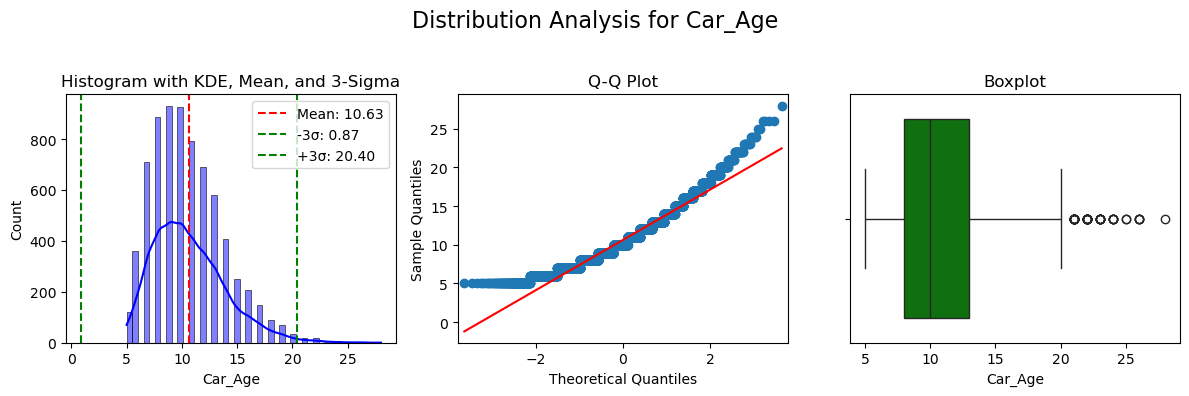

Skewness for Car_Age: 0.84
Kurtosis for Car_Age: 0.91
Kolmogorov-Smirnov Test for Car_Age: Statistic=1.000, p-value=0.000
The Car_Age does not appear to be normally distributed.


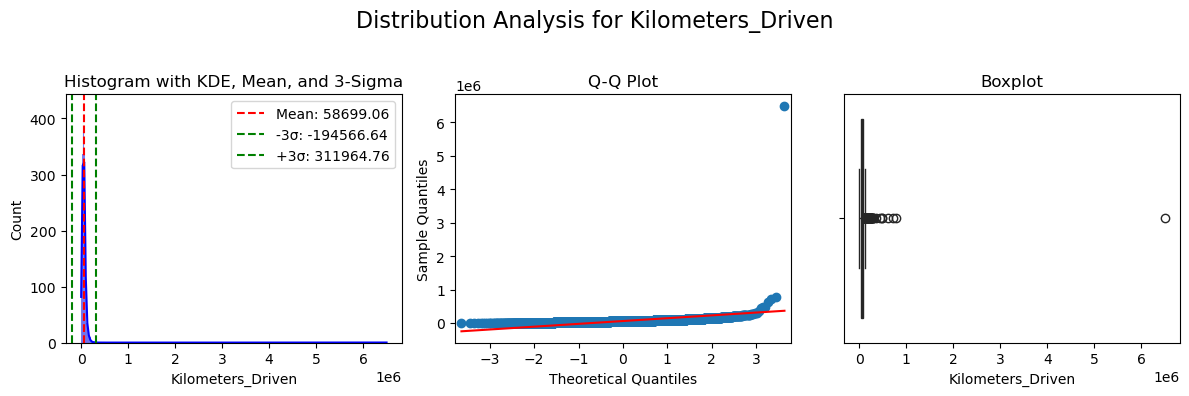

Skewness for Kilometers_Driven: 61.57
Kurtosis for Kilometers_Driven: 4671.51
Kolmogorov-Smirnov Test for Kilometers_Driven: Statistic=1.000, p-value=0.000
The Kilometers_Driven does not appear to be normally distributed.


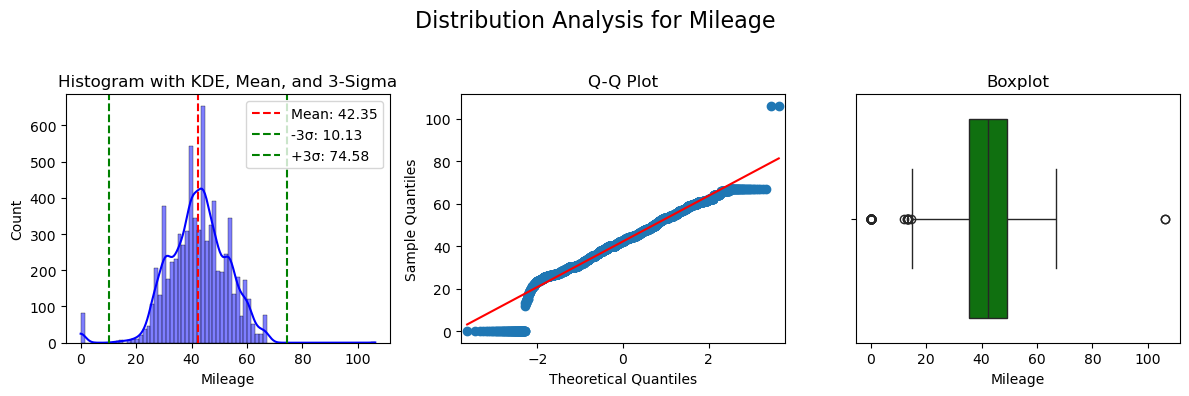

Skewness for Mileage: -0.46
Kurtosis for Mileage: 1.81
Kolmogorov-Smirnov Test for Mileage: Statistic=0.989, p-value=0.000
The Mileage does not appear to be normally distributed.


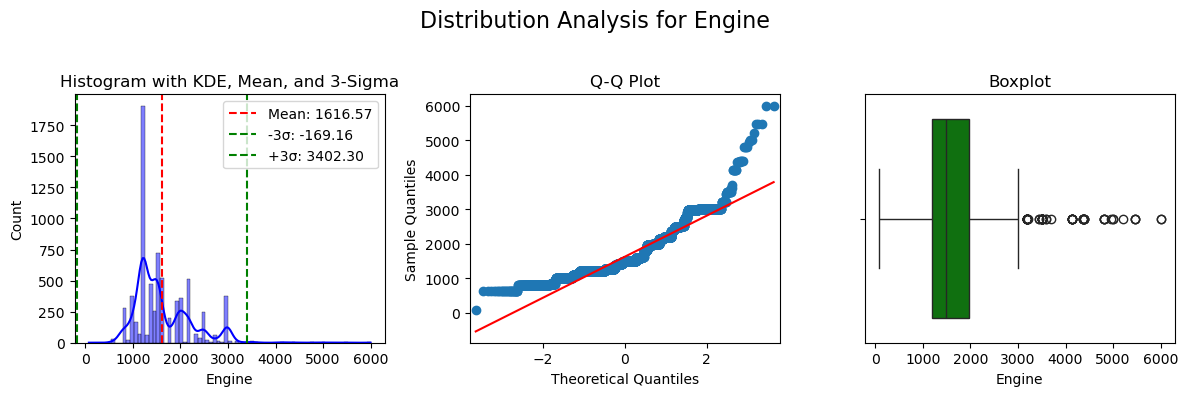

Skewness for Engine: 1.41
Kurtosis for Engine: 3.17
Kolmogorov-Smirnov Test for Engine: Statistic=1.000, p-value=0.000
The Engine does not appear to be normally distributed.


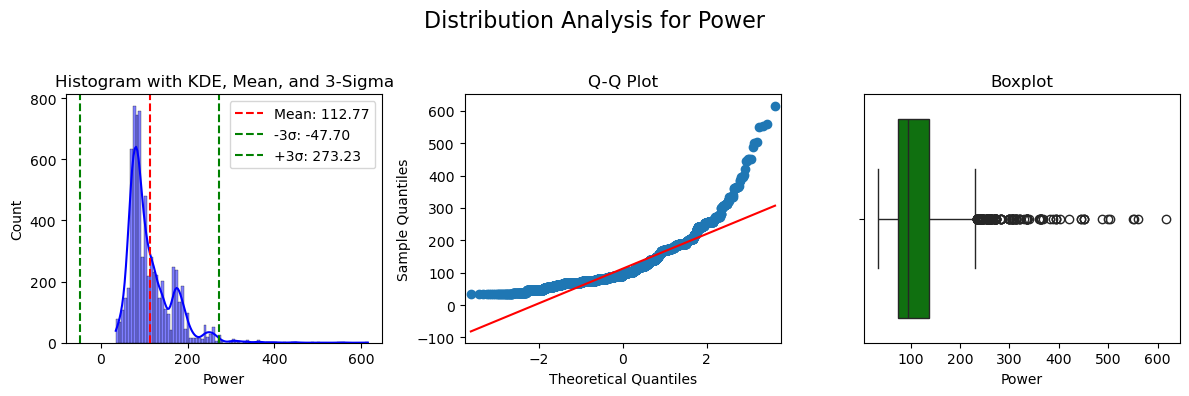

Skewness for Power: 1.96
Kurtosis for Power: 7.12
Kolmogorov-Smirnov Test for Power: Statistic=1.000, p-value=0.000
The Power does not appear to be normally distributed.


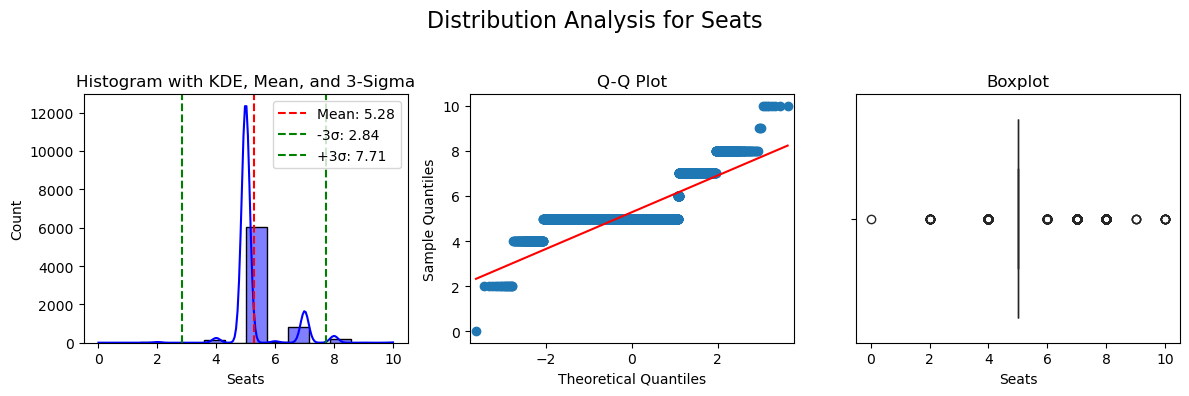

Skewness for Seats: 1.90
Kurtosis for Seats: 4.70
Kolmogorov-Smirnov Test for Seats: Statistic=0.997, p-value=0.000
The Seats does not appear to be normally distributed.


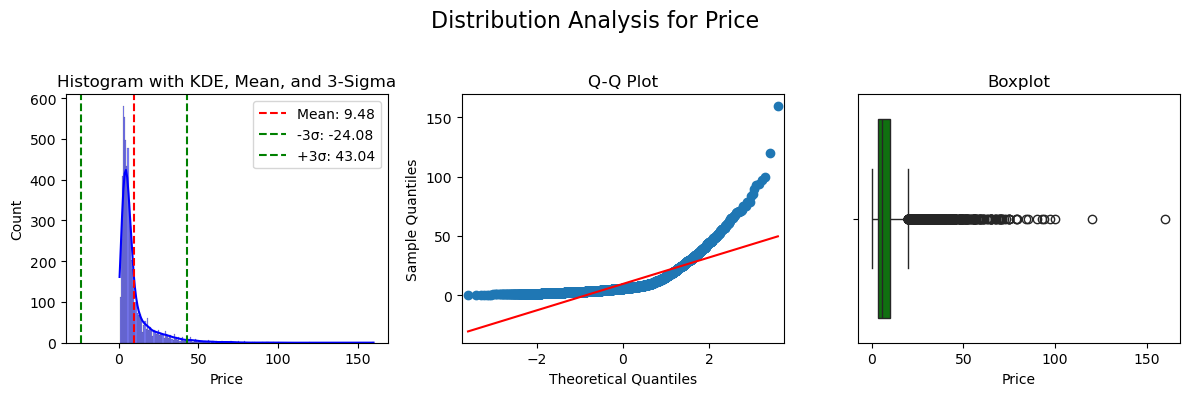

Skewness for Price: 3.33
Kurtosis for Price: 17.08
Kolmogorov-Smirnov Test for Price: Statistic=0.910, p-value=0.000
The Price does not appear to be normally distributed.


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import kstest, skew, kurtosis
import pandas as pd
import numpy as np

def check_distribution(df, column):
    # Drop missing values for the analysis
    data = df[column].dropna()

    # 3. Calculate mean and standard deviation
    mean_value = np.mean(data)
    std_dev = np.std(data)
    
    # Calculate 3-sigma boundaries
    lower_3sigma = mean_value - 3 * std_dev
    upper_3sigma = mean_value + 3 * std_dev
    
    # 4. Create side-by-side plots
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    fig.suptitle(f'Distribution Analysis for {column}', fontsize=16)
    
    # 4A. Histogram with KDE, mean, and 3-sigma boundaries
    sns.histplot(data, kde=True, color='blue', ax=axes[0])
    axes[0].set_title('Histogram with KDE, Mean, and 3-Sigma')
    
    # Plot vertical lines for mean and 3-sigma boundaries
    axes[0].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    axes[0].axvline(lower_3sigma, color='green', linestyle='--', label=f'-3σ: {lower_3sigma:.2f}')
    axes[0].axvline(upper_3sigma, color='green', linestyle='--', label=f'+3σ: {upper_3sigma:.2f}')
    
    # Add a legend
    axes[0].legend()
    
    # 4B. Q-Q Plot
    sm.qqplot(data, line='s', ax=axes[1])
    axes[1].set_title('Q-Q Plot')
    
    # 4C. Boxplot
    sns.boxplot(x=data, ax=axes[2], color='green')
    axes[2].set_title('Boxplot')

    # Adjust layout and show plots
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
    plt.show()

    # 1. Skewness and Kurtosis
    col_skewness = skew(data)
    col_kurtosis = kurtosis(data)
    
    # 2. Kolmogorov-Smirnov Test
    stat, p_value = kstest(data, 'norm')
    
    # Print the statistical values
    print(f"Skewness for {column}: {col_skewness:.2f}")
    print(f"Kurtosis for {column}: {col_kurtosis:.2f}")
    print(f"Kolmogorov-Smirnov Test for {column}: Statistic={stat:.3f}, p-value={p_value:.3f}")

    # Check for normal distribution based on skewness, kurtosis, and K-S test
    if abs(col_skewness) < 0.5 and abs(col_kurtosis) < 3 and p_value > 0.05:
        print(f"The {column} seems to be normally distributed.")
        return [column, col_skewness, col_kurtosis, stat, p_value, "normal distribution"]
    else:
        print(f"The {column} does not appear to be normally distributed.")
        return [column, col_skewness, col_kurtosis, stat, p_value, "not normal distribution"]
    


column_stats = [["column_name", "skewness", "kurtosis", "ks-stat", "p_value", "distribution"]]
for column in outlier_columns:
    stats = check_distribution(df, column)
    column_stats.append(stats)

In [16]:
column_stats_df = pd.DataFrame(column_stats[1:], columns=column_stats[0])
column_stats_df.head(10)

,column_name,skewness,kurtosis,ks-stat,p_value,distribution
0,Car_Age,0.839642,0.909033,1.000000,0.0,not normal distribution
1,Kilometers_Driven,61.569838,4671.511206,1.000000,0.0,not normal distribution
2,Mileage,-0.462975,1.805555,0.988832,0.0,not normal distribution
3,Engine,1.412119,3.173880,1.000000,0.0,not normal distribution
4,Power,1.960762,7.123825,1.000000,0.0,not normal distribution
5,Seats,1.901866,4.699330,0.997329,0.0,not normal distribution
6,Price,3.334401,17.077010,0.910282,0.0,not normal distribution


### Please count(print) how many outliers for each column. 


In [17]:
import pandas as pd

def count_outliers(df, column):
    """
    Count the number of outliers in a specified column of a DataFrame using the IQR method,
    while ignoring empty or missing values.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column (str): The name of the column to check for outliers.

    Returns:
    int: The number of outliers in the specified column.
    """
    # Check if the column exists in the DataFrame
    if column not in df.columns:
        raise ValueError(f"Column '{column}' does not exist in the DataFrame.")

    missing_count = df[column].isna().sum()

    # Drop NaN values from the specified column
    cleaned_data = df[column].dropna()

    # Check if there is enough data to calculate Q1 and Q3
    if len(cleaned_data) < 4:
        raise ValueError("Not enough non-missing data to determine outliers.")

    # Calculate Q1 and Q3
    Q1 = cleaned_data.quantile(0.25)
    Q3 = cleaned_data.quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outlier_condition = (cleaned_data < lower_bound) | (cleaned_data > upper_bound)
    outlier_count = cleaned_data[outlier_condition].shape[0]

    return [column, df.shape[0], missing_count, outlier_count, df.shape[0] - (missing_count + outlier_count)]

outlier_stats = [["column_name", "total_count", "na_count", "outlier_count", "good_value_count"]]
for column in outlier_columns:
    stats = count_outliers(df, column)
    outlier_stats.append(stats)

outlier_stats_df = pd.DataFrame(outlier_stats[1:], columns=outlier_stats[0])
outlier_stats_df.head(10)

,column_name,total_count,na_count,outlier_count,good_value_count
0,Car_Age,7253,0,58,7195
1,Kilometers_Driven,7253,0,258,6995
2,Mileage,7253,0,90,7163
3,Engine,7253,46,65,7142
4,Power,7253,175,273,6805
5,Seats,7253,53,1153,6047
6,Price,7253,1234,718,5301


### Please draw box-plot for the columns. Please draw box-plot together if the scales of the columns are in similar range. Otherwise, please draw box-plot separately.  


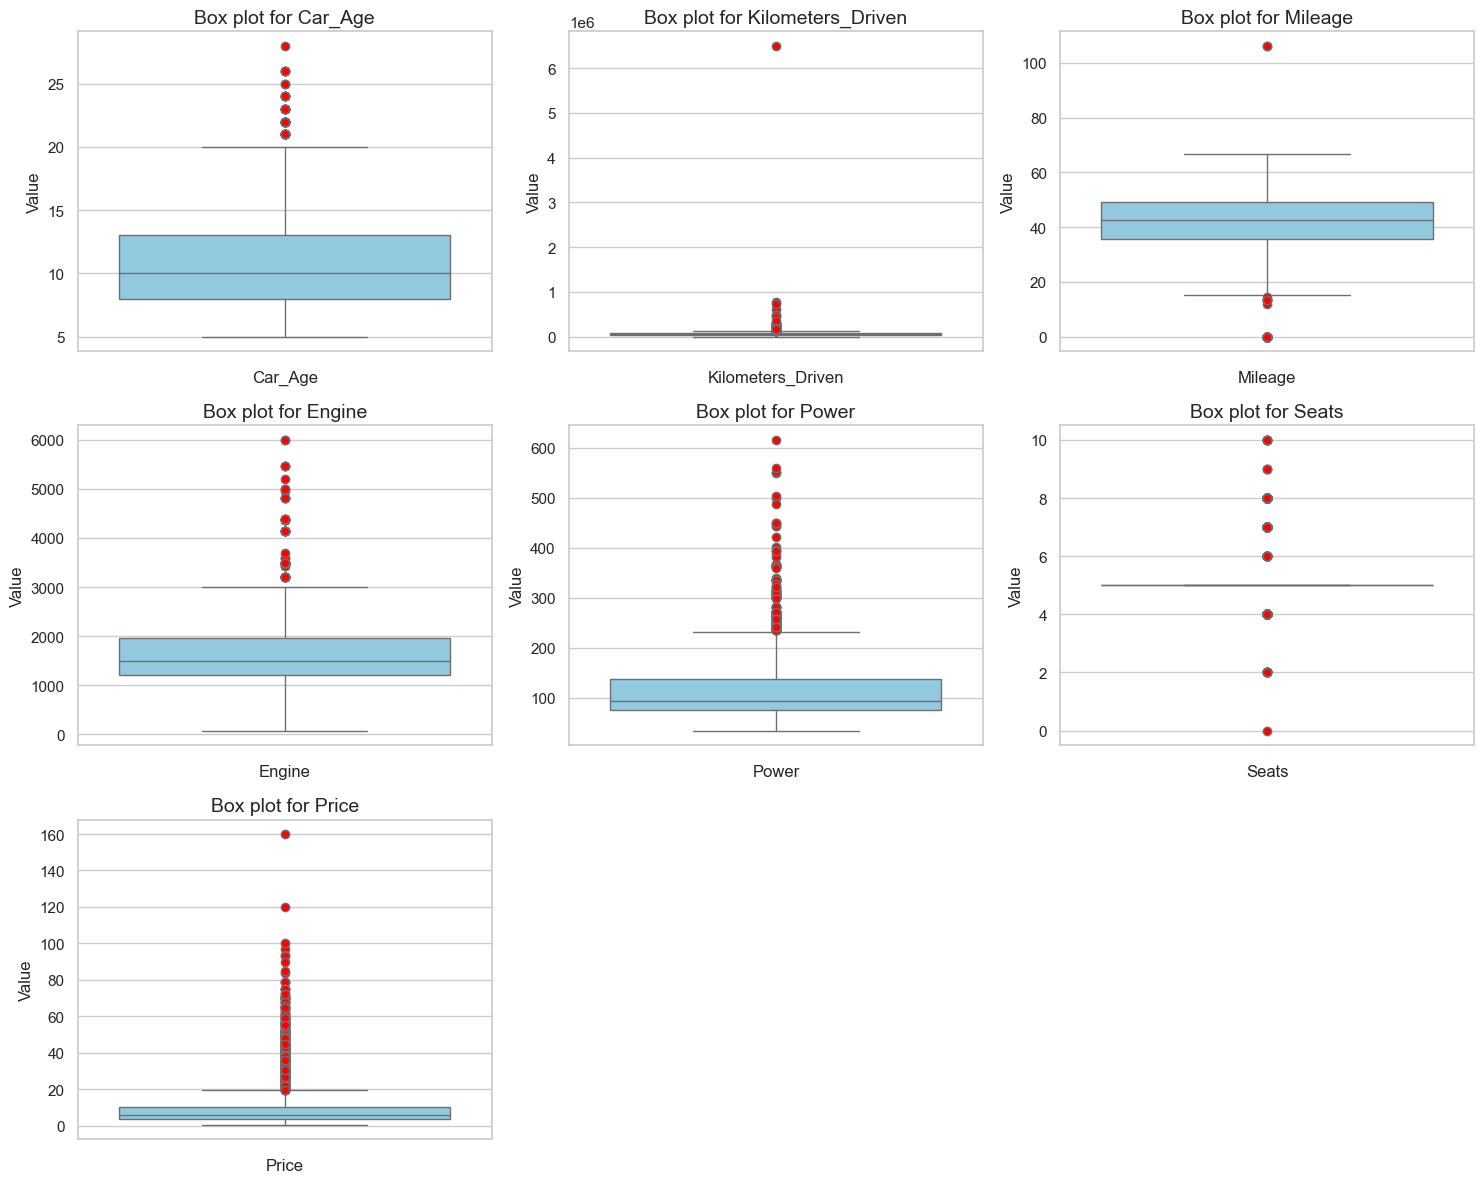

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

def plot_boxplots(df, columns):
    """
    Plot box plots for the specified columns from the DataFrame.
    Displays 3 box plots per row, with outliers shown in red.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): The list of column names for which box plots should be generated.

    Returns:
    None
    """
    # Set the style for seaborn
    sns.set(style="whitegrid")

    # Number of columns for box plots per row
    n_cols = 3
    n_rows = math.ceil(len(columns) / n_cols)  # Calculate number of rows needed

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
    axes = axes.flatten()  # Flatten the 2D array of axes

    # Plot each box plot
    for i, col in enumerate(columns):
        if col not in df.columns:
            raise ValueError(f"Column '{col}' does not exist in the DataFrame.")
        
        # Box plot for each column, with outliers in red
        sns.boxplot(data=df, y=col, ax=axes[i], color="skyblue", flierprops=dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none'))

        axes[i].set_title(f'Box plot for {col}', fontsize=14)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Value')

    # Hide any extra axes if the number of columns is not a multiple of 3
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


plot_boxplots(df, outlier_columns)

### Please draw box-plot for ‘Mileage’ with ‘Fuel_Type’.    


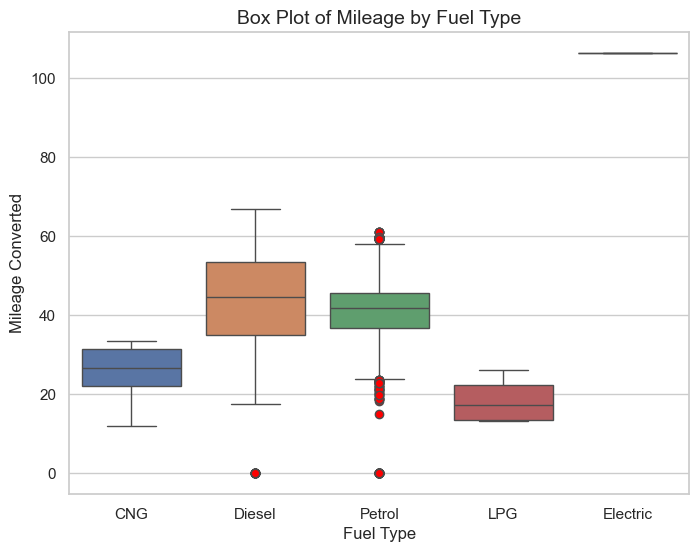

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the color palette for different fuel types
palette = sns.color_palette("Set2")  # You can change this to any other palette you prefer

# Customize the appearance of outliers
flierprops = dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none')

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fuel_Type', y='Mileage', hue='Fuel_Type', data=df, flierprops=flierprops)

# Add title and show plot
plt.title('Box Plot of Mileage by Fuel Type', fontsize=14)
plt.xlabel('Fuel Type')
plt.ylabel('Mileage Converted')
plt.show()


# 4. (1.5 pts) Pearson correlation coefficient and scatter plot  

### Please calculate Pearson correlation coefficient between two columns for the following columns:  ‘Car_Age’, ‘Kilometers_Driven’, ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’.  
 
### NOTE:  
Before calculating the coefficient, you need to exclude the outliers.  

You should calculate the coefficient from scratch.  

Please draw scatterplots between two columns for the following columns: ‘Car_Age’, ‘Kilometers_Driven’, ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’. 

Please include the coefficient value inside of the figures. 

In [20]:
# Remove outliers based on the previously identified IQR method
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]

# Remove outliers for each numerical column
df_no_outliers = df.copy()
for col in outlier_columns:
    df_no_outliers = remove_outliers(df_no_outliers, col)

df_no_outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,4060.0,2013.419458,3.038339,2004.00,2011.0000,2014.0000,2016.0000,2019.0000
Kilometers_Driven,4060.0,52699.244828,26273.304060,171.00,33000.0000,52000.0000,69753.7500,131000.0000
Mileage,4060.0,45.676899,8.895804,17.30,39.9840,44.9232,52.4496,66.7968
Engine,4060.0,1368.443842,330.144343,793.00,1197.0000,1248.0000,1498.0000,2997.0000
Power,4060.0,93.392709,30.507945,34.20,73.9400,85.8000,106.0000,231.1000
Seats,4060.0,5.000000,0.000000,5.00,5.0000,5.0000,5.0000,5.0000
Price,4060.0,5.305835,2.875566,0.45,3.2075,4.7000,6.6900,15.0000
Car_Age,4060.0,10.580542,3.038339,5.00,8.0000,10.0000,13.0000,20.0000


/var/folders/l2/k_0hhyfd76b__51kf1m_vk_c0000gn/T/ipykernel_29801/3091244527.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return numerator / denominator


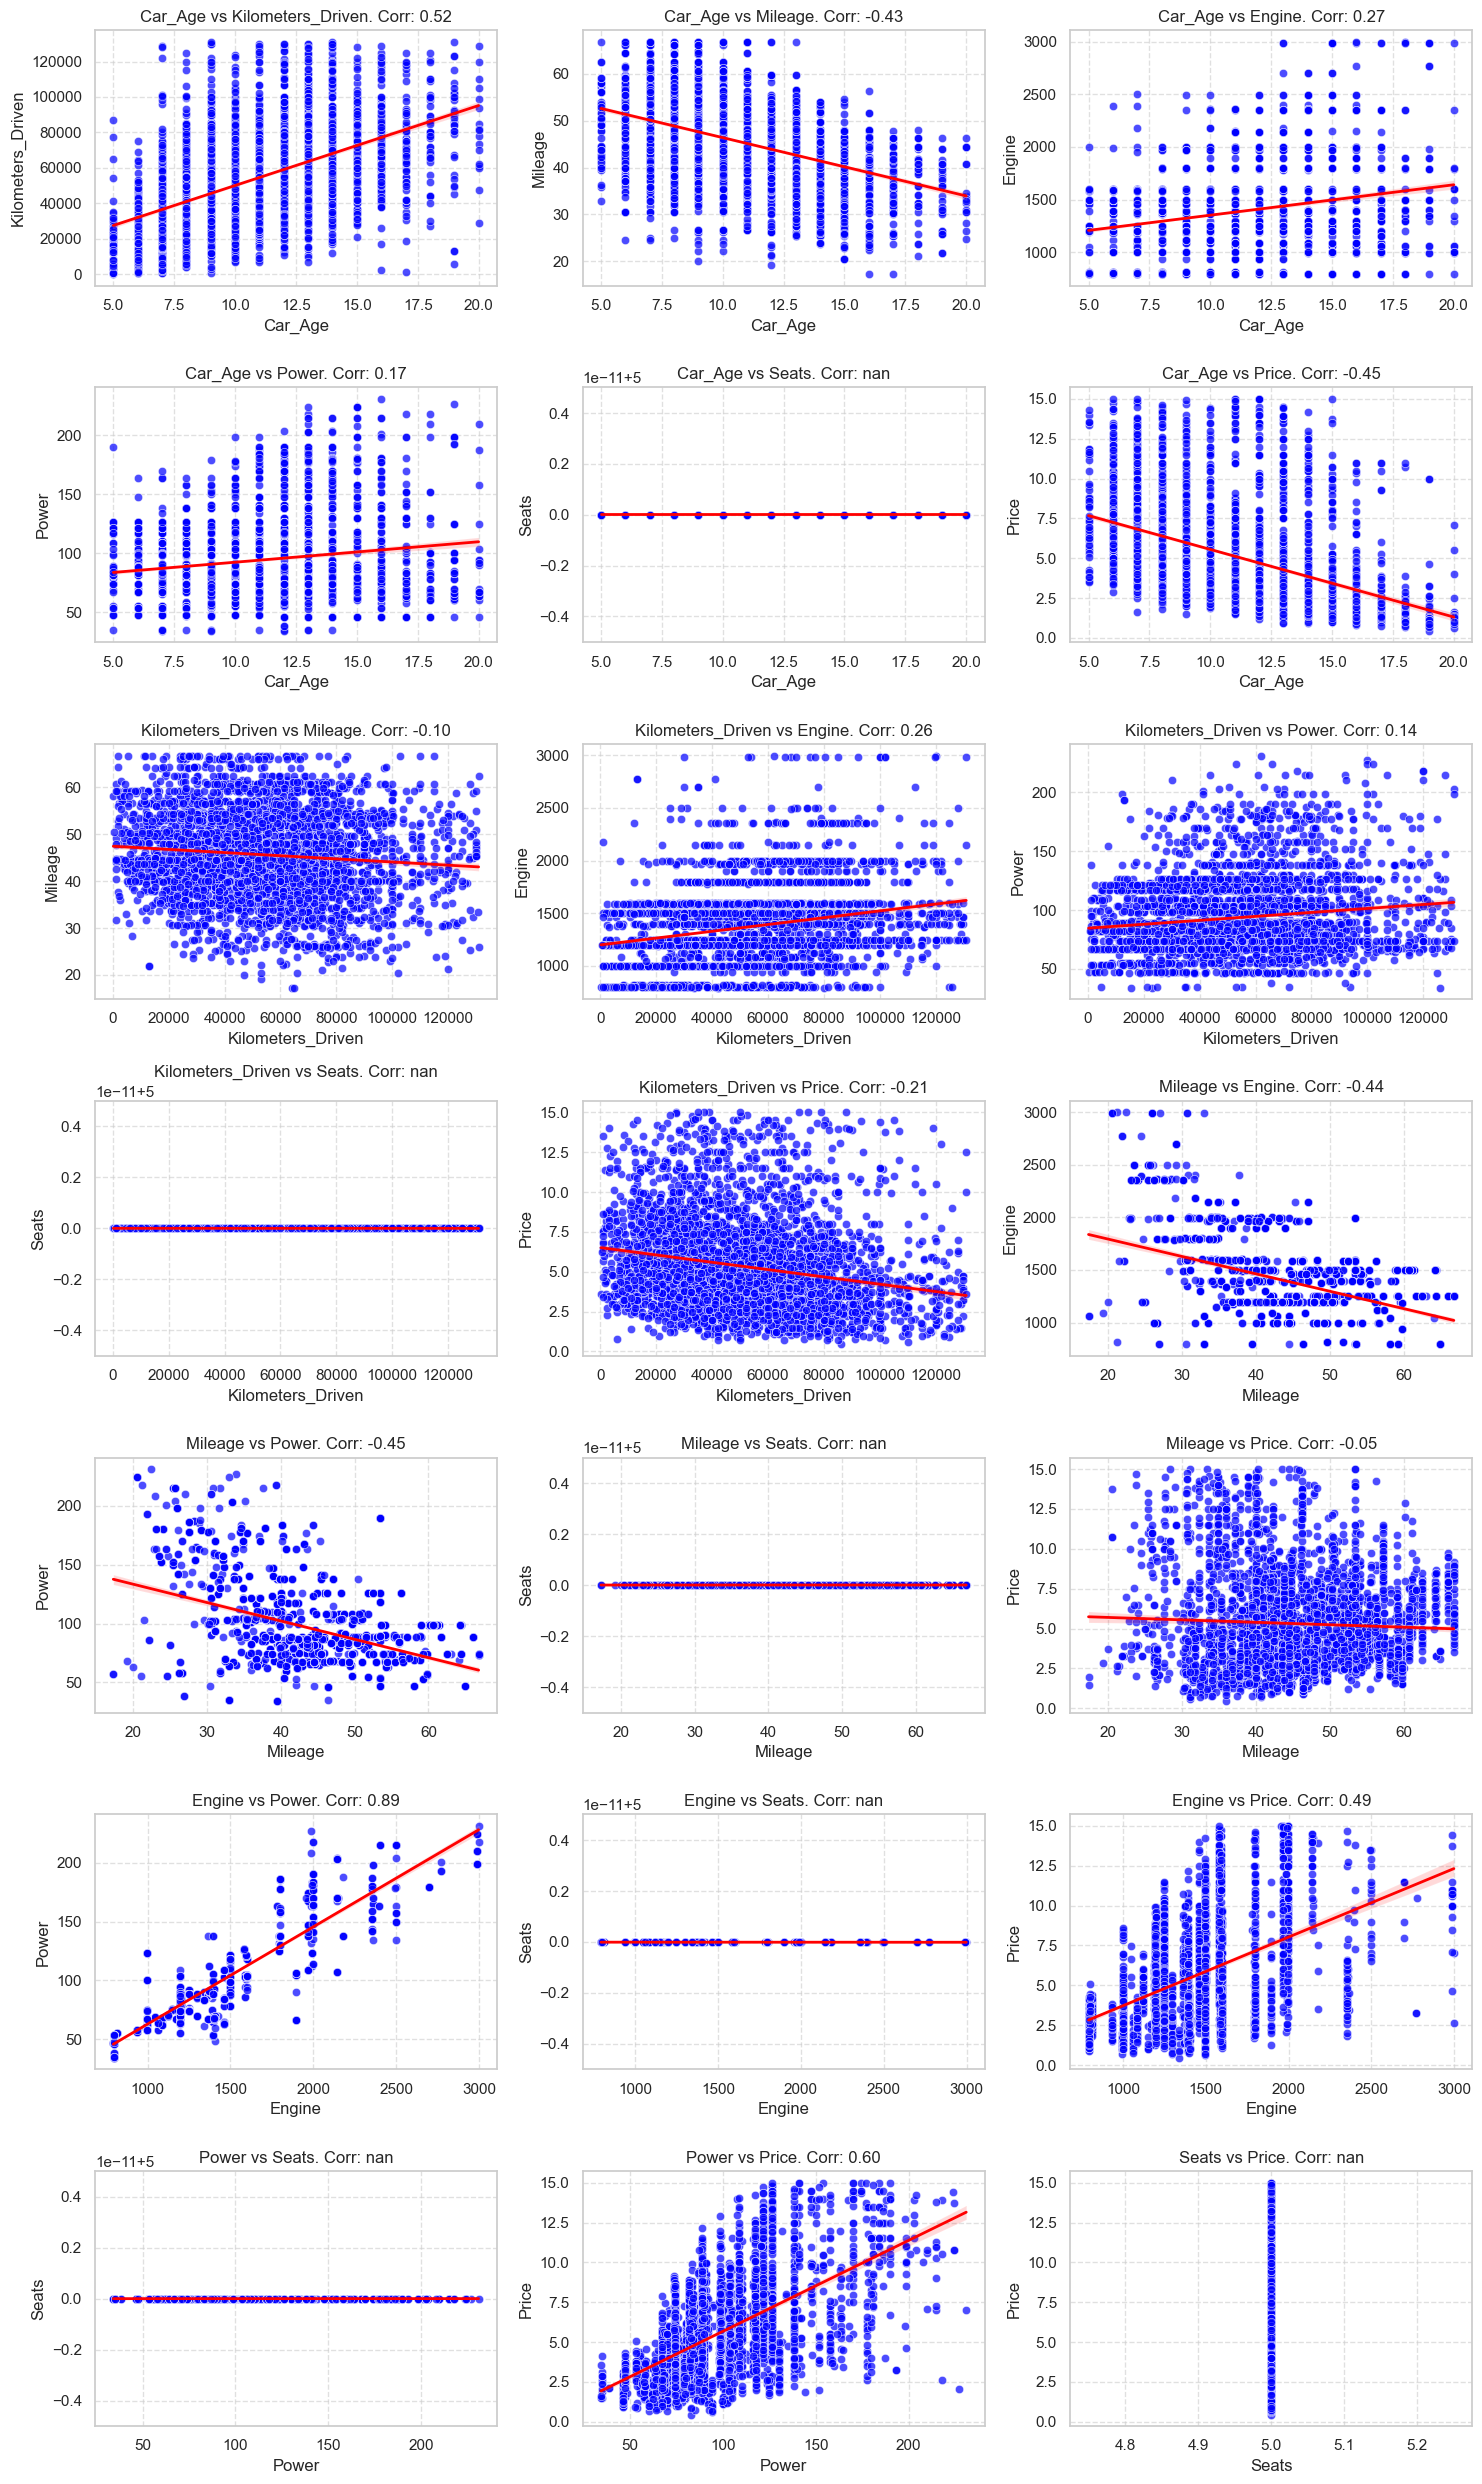

In [21]:
# Define a function to calculate Pearson correlation coefficient from scratch
def pearson_correlation(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sqrt(np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2))
    return numerator / denominator


# Calculate Pearson correlation coefficients between specified columns
pearson_corr = {}
for i in range(len(outlier_columns)):
    for j in range(i+1, len(outlier_columns)):
        col1 = outlier_columns[i]
        col2 = outlier_columns[j]
        corr_value = pearson_correlation(df_no_outliers[col1], df_no_outliers[col2])
        pearson_corr[(col1, col2)] = corr_value

# Display scatterplots with Pearson correlation coefficient inside the figures
plt.figure(figsize=(15, 25))
plot_num = 1
for i in range(len(outlier_columns)):
    for j in range(i+1, len(outlier_columns)):
        plt.subplot(7, 3, plot_num)
        col1 = outlier_columns[i]
        col2 = outlier_columns[j]
        plt.grid(True, linestyle='--', alpha=0.6)
        # plt.scatter(df_no_outliers[col1], df_no_outliers[col2])
        sns.scatterplot(x=df_no_outliers[col1], y=df_no_outliers[col2], alpha=0.7, color='blue')  # Add transparency and distinct color

        sns.regplot(x=df_no_outliers[col1], y=df_no_outliers[col2], scatter=False, color='red', line_kws={'linewidth': 2})

        plt.title(f'{col1} vs {col2}. Corr: {pearson_corr[(col1, col2)]:.2f}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plot_num += 1

plt.tight_layout()
plt.show()

# Display the Pearson correlation coefficients
# tools.display_dataframe_to_user(name="Pearson Correlation Coefficients", dataframe=pd.DataFrame.from_dict(pearson_corr, orient='index', columns=['Correlation Coefficient']))


# 5. (3 pts) Handling missing values

### There are missing values in the following columns: ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’. Please treat the outliers also as missing values.


### (1.5 pt) Please count(print) missing values for each column in the columns of ‘Engine’, ‘Power’, and ‘Seats’. 

#### Please impute the missing values based on subclass (subgroups).

#### Please draw histogram(distribution) for each column and use different color for the imputed missing values.

### NOTE:
For categorical or discrete features, use mode. For continuous features, use mean for all samples belonging to the same subclass. 
If imputing using a subclass or multiple subclasses does not impute all the missing values, please impute using the subclass as much as possible. Then, impute using the global constant for the remaining rows.


In [22]:
missing_columns = ['Engine', 'Power', 'Seats']

missing_stats = [["column_name", "total_count", "na_count", "outlier_count", "good_value_count"]]
for column in missing_columns:
    stats = count_outliers(df, column)
    missing_stats.append(stats)

missing_stats_df = pd.DataFrame(missing_stats[1:], columns=missing_stats[0])
missing_stats_df.head(10)

,column_name,total_count,na_count,outlier_count,good_value_count
0,Engine,7253,46,65,7142
1,Power,7253,175,273,6805
2,Seats,7253,53,1153,6047


Columns Stats for column = 'Engine', lower_bound = 43.0, upper_bound = 3123.0
<class 'numpy.ndarray'>


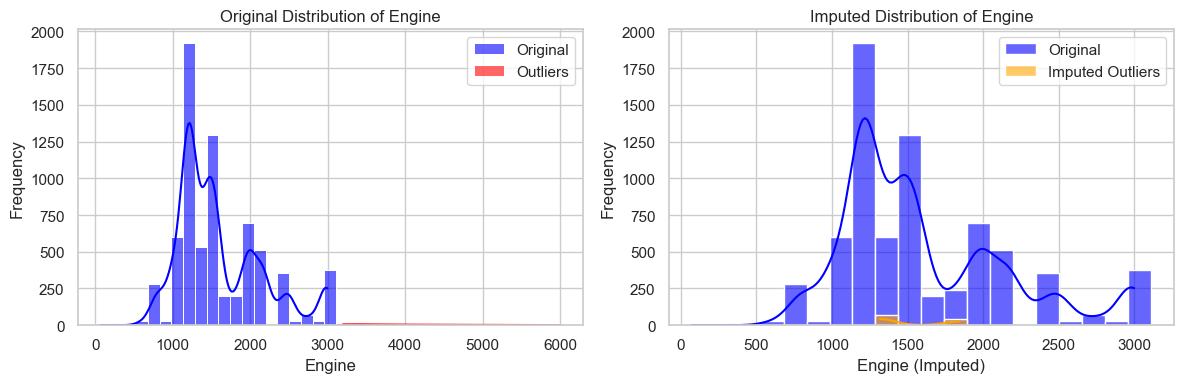

Columns Stats for column = 'Power', lower_bound = -19.64999999999999, upper_bound = 232.75
<class 'numpy.ndarray'>


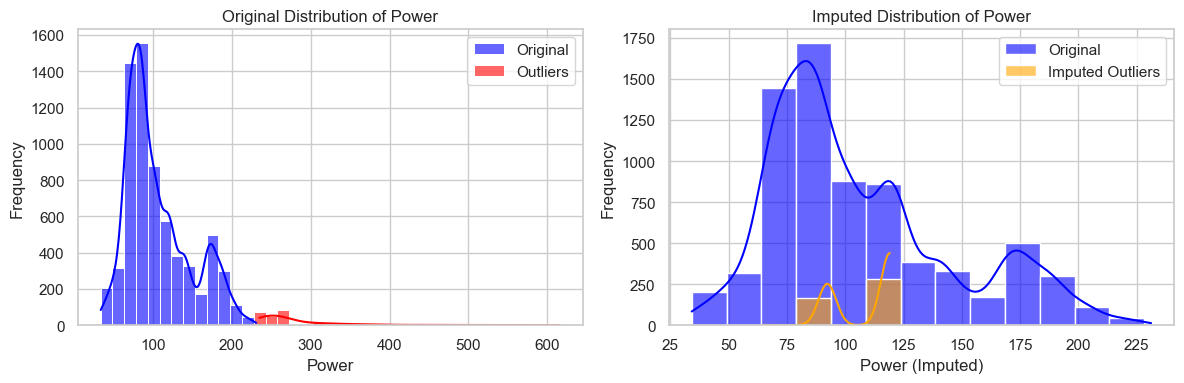

Columns Stats for column = 'Seats', lower_bound = 5.0, upper_bound = 5.0
<class 'int'>


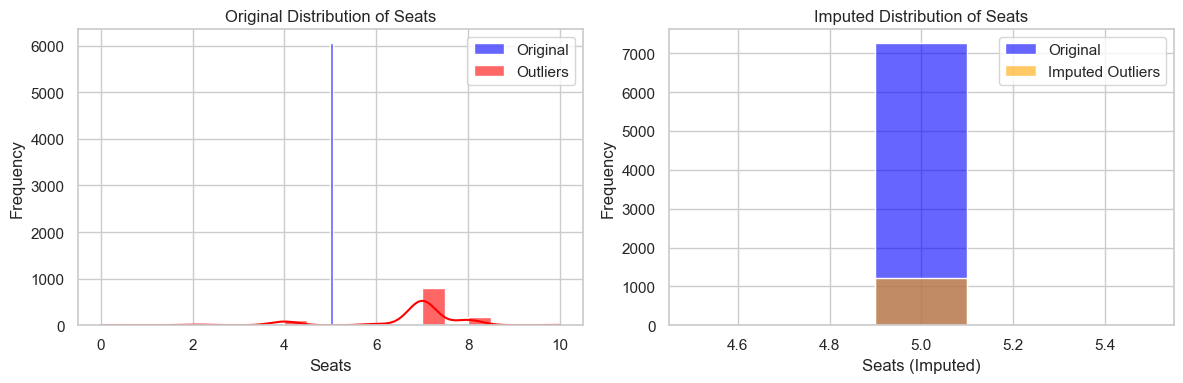

In [23]:
# Re-defining the detect_impute_and_plot function with better handling
def detect_impute_and_plot(df, column, subclass):
    # Calculate Q1, Q3, and IQR for outlier detection

    bins = 20 if column == 'Seats' else np.linspace(df[column].min(), df[column].max(), 40)
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Columns Stats for {column = }, {lower_bound = }, {upper_bound = }")

    # Mark outliers as NaN and store them for plotting
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), np.nan, df[column])

    # Impute missing values using the mean of the subclass
    df[column + '_imputed'] = df.groupby(subclass)[column].transform(lambda x: x.fillna(x.mean()))
    
    # If some missing values are still present, impute with the global mean
    global_mean = df[column].mean()
    df[column + '_imputed'].fillna(global_mean, inplace=True)

    # Plot original and imputed distributions side by side
    plt.figure(figsize=(12, 4))

    # Original data plot with outliers marked in red
    plt.subplot(1, 2, 1)
    sns.histplot(df[column].dropna(), color='blue', label='Original', kde=True, bins=bins, alpha=0.6)
    sns.histplot(outliers[column], color='red', label='Outliers', kde=True, bins=bins, alpha=0.6)
    plt.title(f'Original Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()

    
    bins = 5 if column == 'Seats' else bins[(bins >= lower_bound) & (bins <= upper_bound)]
    print(type(bins))

    # Imputed data plot
    plt.subplot(1, 2, 2)
    sns.histplot(df[column + '_imputed'], color='blue', label='Original', kde=True, bins=bins, alpha=0.6)
    # Show imputed outliers in green
    imputed_outliers = df[df[column].isna()][column + '_imputed']
    sns.histplot(imputed_outliers, color='orange', label='Imputed Outliers', kde=True, bins=bins, alpha=0.6)
    plt.title(f'Imputed Distribution of {column}')
    plt.xlabel(column + ' (Imputed)')
    plt.ylabel('Frequency')
    plt.legend()

    plt.tight_layout()
    plt.show()
    df[column] = df[column + '_imputed']
    df = df.drop(columns = [column + '_imputed'])
    return df

df_impute = df.copy()
# Applying the function for 'Engine', 'Power', and 'Seats'
simple_imputation_columns = ['Engine', 'Power', 'Seats']
for col in simple_imputation_columns:
    df_impute = detect_impute_and_plot(df_impute.copy(), col, 'Fuel_Type')

In [24]:
df_impute.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.0000,2014.000000,2016.00000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0000,53416.000000,73000.00000,6500000.00
Mileage,7253.0,42.350630,10.742235,0.00,35.5152,42.477120,49.20384,106.25
Engine,7253.0,1593.977467,545.895373,72.00,1198.0000,1461.000000,1968.00000,2999.00
Power,7253.0,106.240741,39.540426,34.20,77.0000,92.317505,126.20000,231.10
Seats,7253.0,5.000000,0.000000,5.00,5.0000,5.000000,5.00000,5.00
Price,6019.0,9.479468,11.187917,0.44,3.5000,5.640000,9.95000,160.00
Car_Age,7253.0,10.634634,3.254421,5.00,8.0000,10.000000,13.00000,28.00


### (1.5 pt) Please count(print) missing values for each column in the columns of ‘Mileage’ and ‘Price’. Please impute the missing values using linear regression. Please draw histogram(distribution) for each column and use different color for the imputed missing values

### NOTE: 
You need to find which columns have strong correlations with ‘Mileage’ or ‘Price’. Then, build the linear regression model using scikit-learn library and apply the model to impute the missing values. 

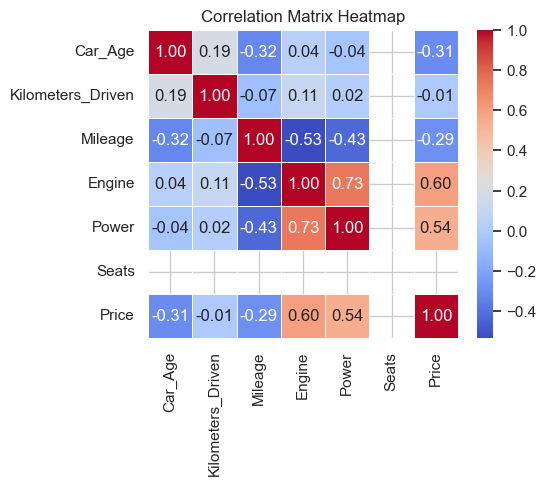

Columns Stats for column = 'Mileage', lower_bound = 14.982240000000001, upper_bound = 69.7368
Number of values that need to be processed = 90
For column = 'Mileage', top  n = 4, variables are = ['Engine', 'Power']


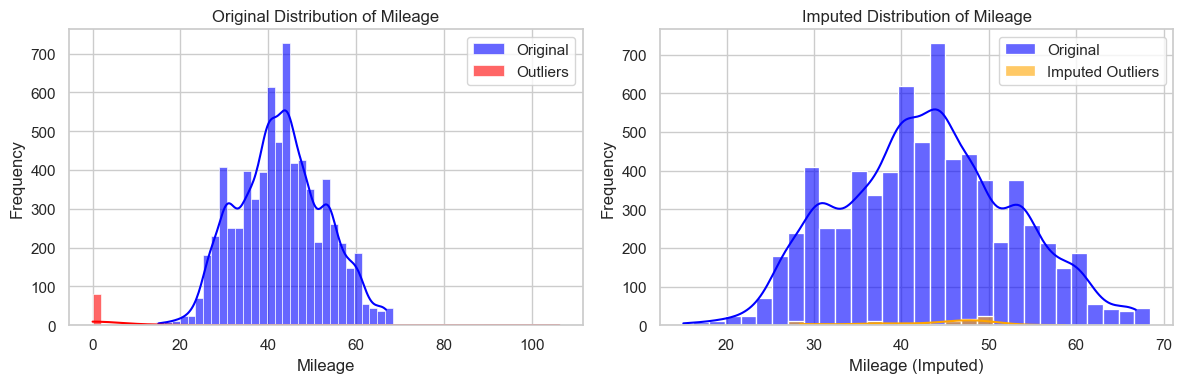

Columns Stats for column = 'Price', lower_bound = -6.174999999999999, upper_bound = 19.625
Number of values that need to be processed = 1952
For column = 'Price', top  n = 4, variables are = ['Engine', 'Power']


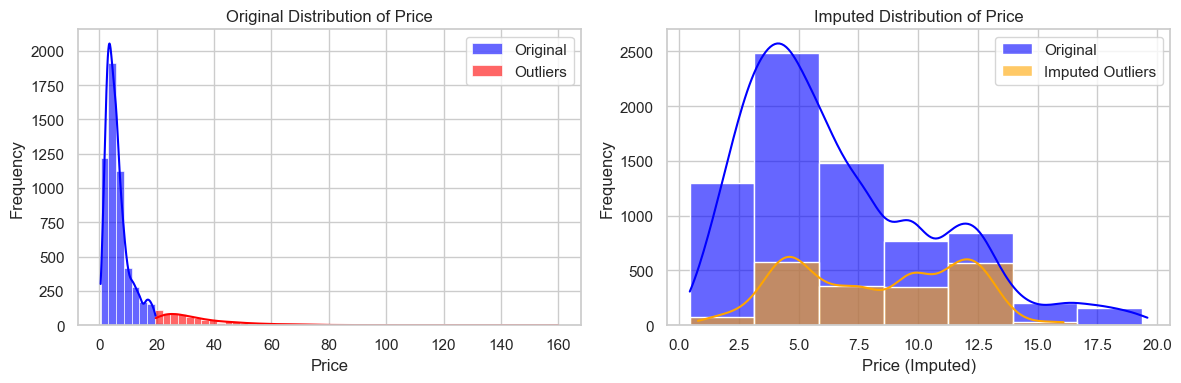

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def detect_impute_and_plot_lr(df, column, subclass, correlation_matrix, n = 2):
    bins = np.linspace(df[column].min(), df[column].max(), 60)
    
    # Calculate Q1, Q3, and IQR for outlier detection
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Columns Stats for {column = }, {lower_bound = }, {upper_bound = }")


    # Mark outliers as NaN and store them for plotting
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), np.nan, df[column])
    
    print(f"Number of values that need to be processed = {df[column].isna().sum()}")

    top_n_vars = correlation_matrix[column].abs().sort_values(ascending=False)[1:3].index.tolist()
    print(f"For {column = }, top { n = }, variables are = {top_n_vars}")

    # Check if there are sufficient variables to perform regression
    if len(top_n_vars) < 2:
        print(f"Not enough correlated variables to perform regression for {column}.")
        return

    # Prepare data for linear regression
    X = df[top_n_vars]
    y = df[column]

    # Split the data into train and missing values for imputation
    X_train = X[df[column].notna()]
    y_train = y[df[column].notna()]
    X_missing = X[df[column].isna()]

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict missing values
    predicted_values = model.predict(X_missing)

    # Fill missing values with the predictions
    df[column + '_imputed'] = df[column]
    df.loc[df[column].isna(), column + '_imputed'] = predicted_values
    # print(df.info()
    
    # Plot original and imputed distributions side by side
    plt.figure(figsize=(12, 4))

    # Original data plot with outliers marked in red
    plt.subplot(1, 2, 1)
    sns.histplot(df[column].dropna(), color='blue', label='Original', kde=True, bins=bins, alpha=0.6)
    sns.histplot(outliers[column], color='red', label='Outliers', kde=True, bins=bins, alpha=0.6)
    plt.title(f'Original Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()

    bins = bins[(bins >= lower_bound) & (bins <= upper_bound)]
    
    # Imputed data plot
    plt.subplot(1, 2, 2)
    sns.histplot(df[column+ '_imputed'].dropna(), color='blue', label='Original', kde=True, bins=bins, alpha=0.6)
    # Show imputed outliers in green
    imputed_outliers = df[df[column].isna()][column + '_imputed']
    sns.histplot(imputed_outliers, color='orange', label='Imputed Outliers', kde=True, bins=bins, alpha=0.6)
    plt.title(f'Imputed Distribution of {column}')
    plt.xlabel(column + ' (Imputed)')
    plt.ylabel('Frequency')
    plt.legend()

    plt.tight_layout()
    plt.show()
    df[column] = df[column + '_imputed']
    df = df.drop(columns = [column + '_imputed'])
    return df
    

# Find the top 2 correlated variables with the target column
correlation_matrix = df_impute[['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']].corr()
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()
    
# Example usage for 'Engine', 'Power', and 'Seats'
for col in ['Mileage', 'Price']:
    df_impute = detect_impute_and_plot_lr(df_impute[['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']].copy(), col, 'Fuel_Type', correlation_matrix, 4)


In [26]:
df_impute.describe().T

,count,mean,std,min,25%,50%,75%,max
Car_Age,7253.0,10.634634,3.254421,5.0000,8.00000,10.000000,13.000000,2.800000e+01
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.0000,34000.00000,53416.000000,73000.000000,6.500000e+06
Mileage,7253.0,42.842561,9.685524,15.0528,35.89152,42.712320,49.203840,6.679680e+01
Engine,7253.0,1593.977467,545.895373,72.0000,1198.00000,1461.000000,1968.000000,2.999000e+03
Power,7253.0,106.240741,39.540426,34.2000,77.00000,92.317505,126.200000,2.311000e+02
Seats,7253.0,5.000000,0.000000,5.0000,5.00000,5.000000,5.000000,5.000000e+00
Price,7253.0,6.676247,3.977316,0.4400,3.65000,5.600000,9.325629,1.960000e+01
